In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Acquire data

In [5]:
# 1. get train, testdatas
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
# combine 2 data
combine = [train_df, test_df]

## Analyze by describing data

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brewe, Dr. Arthur Jackson",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze by pivoting features

In [11]:
# pclass
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# sex
train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# sibsp
train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# parch
train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().\
sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
# mix
pivot_table = train_df.pivot_table('Survived', ['Pclass', 'Parch', 'Sex', 'SibSp'])
pivot_table

Survived
Pclass Parch Sex    SibSp          
1      0     female 0      0.970588
                    1      1.000000
                    2      1.000000
             male   0      0.333333
                    1      0.454545
                    2      0.500000
       1     female 0      1.000000
                    1      1.000000
             male   0      0.222222
                    1      0.400000
       2     female 0      1.000000
                    1      0.500000
                    2      1.000000
                    3      1.000000
             male   0      0.500000
                    1      1.000000
                    3      0.000000
       4     male   1      0.000000
2      0     female 0      0.906250
                    1      0.833333
                    3      1.000000
             male   0      0.097222
                    1      0.071429
                    2      0.000000
       1     female 0      1.000000
                    1      0.888889
                    2      1.000000
             male   0      0.000000
                    1      0.545455
                    2      0.500000
...                             ...
3      1     female 1      0.500000
                    2      1.000000
                    3      0.000000
             male   0      0.500000
                    1      0.400000
                    3      0.000000
                    4      0.000000
       2     female 0      0.600000
                    1      0.000000
                    2      0.000000
                    3      0.000000
                    4      0.333333
                    5      0.000000
                    8      0.000000
             male   0      0.500000
                    1      0.333333
                    3      0.000000
                    4      0.333333
                    5      0.000000
                    8      0.000000
       3     female 0      1.000000
                    1      0.000000
             male   1      0.000000
       4     female 0      0.000000
                    1      0.000000
             male   1      0.000000
       5     female 0      0.000000
                    1      0.500000
             male   1      0.000000
       6     female 1      0.000000

[74 rows x 1 columns]

## Analyze by visualizing data


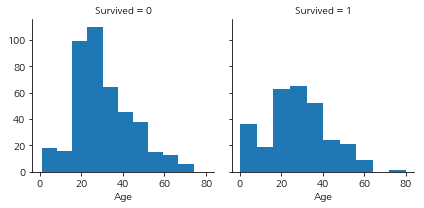

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

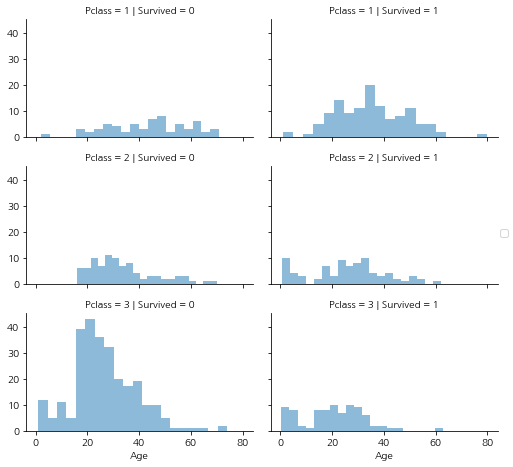

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

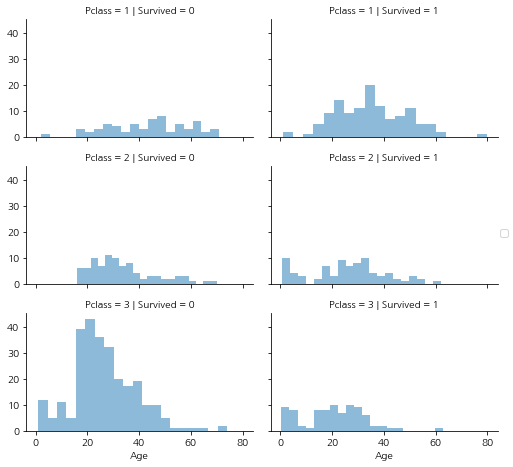

In [18]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\jeeyun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\jeeyun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


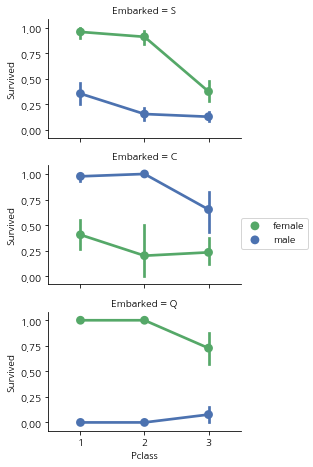

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\jeeyun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


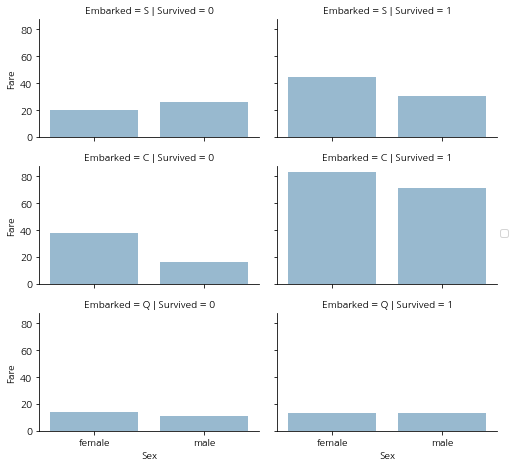

In [20]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

### Correcting by dropping features


In [21]:
print('before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)


In [22]:
#ticket, cabin 없애기
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [23]:
print('before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

before (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing

In [24]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(r' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [27]:
# drop name
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [28]:
# converting categorical feature
# 여자 1 남자 0으로 바꾸기
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

In [29]:
# null값 없애기
# 1) 나이 : Gender, Pclass별로 평균값과 표준편차 사이의 랜덤한 수를 넣는다

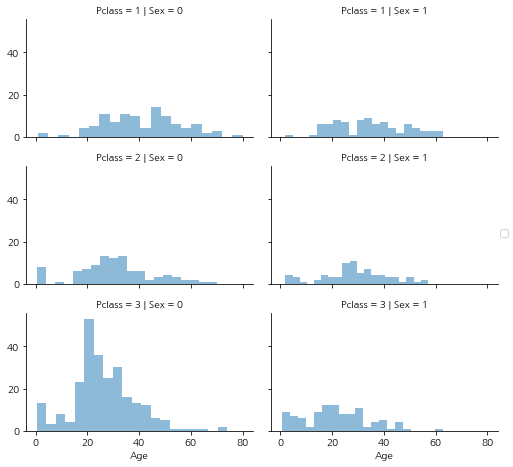

In [30]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [31]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
combine

[     Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  Title
 0           0       3    0  22.0      1      0    7.2500        S      1
 1           1       1    1  38.0      1      0   71.2833        C      3
 2           1       3    1  26.0      0      0    7.9250        S      2
 3           1       1    1  35.0      1      0   53.1000        S      3
 4           0       3    0  35.0      0      0    8.0500        S      1
 5           0       3    0   NaN      0      0    8.4583        Q      1
 6           0       1    0  54.0      0      0   51.8625        S      1
 7           0       3    0   2.0      3      1   21.0750        S      4
 8           1       3    1  27.0      0      2   11.1333        S      3
 9           1       2    1  14.0      1      0   30.0708        C      3
 10          1       3    1   4.0      1      1   16.7000        S      2
 11          1       1    1  58.0      0      0   26.5500        S      2
 12          0       3    0  20.0     

In [33]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]\
                              ['Age'].dropna()
            print('kk', guess_df.isnull().sum())
            age_guess = guess_df.median()
            print(guess_ages)
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[\
                        (dataset.Age.isnull()) &\
                        (dataset.Sex == i) &\
                        (dataset.Pclass == j+1),
                        'Age'
                       ] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df

kk 0
[[0. 0. 0.]
 [0. 0. 0.]]
kk 0
[[40.  0.  0.]
 [ 0.  0.  0.]]
kk 0
[[40. 30.  0.]
 [ 0.  0.  0.]]
kk 0
[[40. 30. 25.]
 [ 0.  0.  0.]]
kk 0
[[40. 30. 25.]
 [35.  0.  0.]]
kk 0
[[40. 30. 25.]
 [35. 28.  0.]]
kk 0
[[40.  30.  25. ]
 [35.  28.  21.5]]
kk 0
[[42.  30.  25. ]
 [35.  28.  21.5]]
kk 0
[[42.  28.  25. ]
 [35.  28.  21.5]]
kk 0
[[42.  28.  24. ]
 [35.  28.  21.5]]
kk 0
[[42.  28.  24. ]
 [41.  28.  21.5]]
kk 0
[[42.  28.  24. ]
 [41.  24.  21.5]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
5,0,3,0,25,0,0,8.4583,Q,1
6,0,1,0,54,0,0,51.8625,S,1
7,0,3,0,2,3,1,21.0750,S,4
8,1,3,1,27,0,2,11.1333,S,3
9,1,2,1,14,1,0,30.0708,C,3


In [34]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()\
                                .sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [35]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


In [36]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    


In [37]:
train_df.groupby('Age').size()

Age
0    100
1    495
2    216
3     69
4     11
dtype: int64

### Create new feature combining existing features : family size

In [38]:
# family size
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
# isalone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
# drop parch, sibsp
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)

In [41]:
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)

In [42]:
combine = [train_df, test_df]
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,"(16.0, 32.0]",2,0
1,1,1,1,2,71.2833,C,3,"(32.0, 48.0]",2,0
2,1,3,1,1,7.9250,S,2,"(16.0, 32.0]",1,1


In [43]:
# age * class
# 어리고 등급 높은 칸에 탈 수록 생존확률이 높아진다?
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df[['Age*Class', 'Survived']].groupby('Age*Class', as_index=False).mean()\
    .sort_values(by='Survived', ascending=False)

,Age*Class,Survived
1,1,0.728814
0,0,0.550000
2,2,0.520408
4,4,0.415094
3,3,0.277487
5,6,0.149425
7,9,0.111111
6,8,0.000000
8,12,0.000000


### Completing a categorical feature : Embarked

In [44]:
# 널값 확인
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
# 가장 자주 나오는 값으로 널값을 채워주기
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric : Embarked

In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked']\
    .map({'S':0, 'C':1, 'Q':2}).astype(int)

### Quick completing and converting a numeric feature : Fare

In [47]:
# 제일 많이 나오는 값으로 채워주기
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,1,6
1,893,3,1,2,7.0000,0,3,2,0,6
2,894,2,0,3,9.6875,2,1,1,1,6
3,895,3,0,1,8.6625,0,1,1,1,3
4,896,3,1,1,12.2875,0,3,3,0,3


In [48]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [49]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [50]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,1,"(16.0, 32.0]",2,0,3
1,1,1,1,2,3,1,3,"(32.0, 48.0]",2,0,2
2,1,3,1,1,1,0,2,"(16.0, 32.0]",1,1,3
3,1,1,1,2,3,0,3,"(32.0, 48.0]",2,0,2
4,0,3,0,2,1,0,1,"(32.0, 48.0]",1,1,6
5,0,3,0,1,1,2,1,"(16.0, 32.0]",1,1,3
6,0,1,0,3,3,0,1,"(48.0, 64.0]",1,1,3
7,0,3,0,0,2,0,4,"(-0.08, 16.0]",5,0,0
8,1,3,1,1,1,0,3,"(16.0, 32.0]",3,0,3
9,1,2,1,0,2,1,3,"(-0.08, 16.0]",2,0,0


In [51]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,1,2,0,3
1,1,1,1,2,3,1,3,2,0,2
2,1,3,1,1,1,0,2,1,1,3
3,1,1,1,2,3,0,3,2,0,2
4,0,3,0,2,1,0,1,1,1,6
5,0,3,0,1,1,2,1,1,1,3
6,0,1,0,3,3,0,1,1,1,3
7,0,3,0,0,2,0,4,5,0,0
8,1,3,1,1,1,0,3,3,0,3
9,1,2,1,0,2,1,3,2,0,0


In [52]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,1,6
1,893,3,1,2,0,0,3,2,0,6
2,894,2,0,3,1,2,1,1,1,6
3,895,3,0,1,1,0,1,1,1,3
4,896,3,1,1,1,0,3,3,0,3
5,897,3,0,0,1,0,1,1,1,0
6,898,3,1,1,0,2,2,1,1,3
7,899,2,0,1,2,0,1,3,0,2
8,900,3,1,1,0,1,3,1,1,3
9,901,3,0,1,2,0,1,3,0,3


## Model, predict and solve

In [53]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 1. Logistic Regression

In [55]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.59

In [66]:
# survived를 없앴다
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.215671
5,Title,0.476947
3,Fare,0.255126
4,Embarked,0.211899
8,Age*Class,-0.157424
2,Age,-0.325558
7,IsAlone,-0.353892
6,FamilySize,-0.458992
0,Pclass,-0.697766


In [61]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'Age*Class'],
      dtype='object')

### 2. Support Vector Machine
두 카테고리 중 어느 하나에 속한 데이터가 주어지면 어디에 속할지 판단하는 이진선형부류를 만들어주는 기법

In [67]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.84

### 3. KNN
기계학습의 일종으로 레이블이 있는 데이터를 활용하여 분류작업을 하는 알고리즘
데이터로부터 거리가 가까운 k개의 다른 데이터의 레이블을 참조하여 분류하는 알고리즘
수치기반 데이터 분류 작업에서 성능이 좋다

In [68]:
# 여기 왜 3개인가...
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.18

### 4. Naive Bayes Classifier
모든 특성값은 서로 독립임을 가정한다
사과의 빨갛다, 둥글다 등의 특성은 연관성이 없고
각각의 특성들이 특정 과일이 사과일 확률에 독립적으로 기여한다. 

In [69]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.36

### 5. Perception

In [70]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\jeeyun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


81.14

### 6. Decision Tree

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

88.55

### 7. Random Forest

In [75]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_train)
score = random_forest.score(X_train, Y_train)
acc_random_forest = round(score * 100, 2)
acc_random_forest

88.55

In [78]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
               acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.55
6,Decision Tree,88.55
1,KNN,84.18
0,Support Vector Machines,83.84
2,Logistic Regression,81.59
5,Perceptron,81.14
4,Naive Bayes,80.36
